In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!pip install seaborn

In [6]:
import seaborn as sns

C:\Users\ykulkarn\AppData\Local\Temp\ipykernel_16464\3497502564.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_averages = df.groupby('hour').mean()
C:\Users\ykulkarn\AppData\Local\Temp\ipykernel_16464\3497502564.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  server_pair_averages = df.groupby(['server1', 'server2']).mean()


       latency  packet_loss     bandwidth
hour                                     
0     0.000433          0.0  3.747323e+09
1     0.000415          0.0  3.746822e+09
2     0.000409          0.0  3.771345e+09
3     0.000412          0.0  3.771096e+09
4     0.000412          0.0  3.700474e+09
5     0.000417          0.0  3.748065e+09
6     0.000401          0.0  3.746119e+09
7     0.000404          0.0  3.747364e+09
19    0.000416          0.0  3.746802e+09
20    0.000401          0.0  3.748325e+09
21    0.000417          0.0  3.772543e+09
22    0.000408          0.0  3.724467e+09
23    0.000419          0.0  3.748251e+09
Server pair with highest average latency:  ('100.71.82.128', '100.71.82.238')
Server pair with highest average packet loss:  ('100.71.82.128', '100.71.82.16')
Server pair with lowest average bandwidth:  ('100.71.82.128', '100.71.82.238')


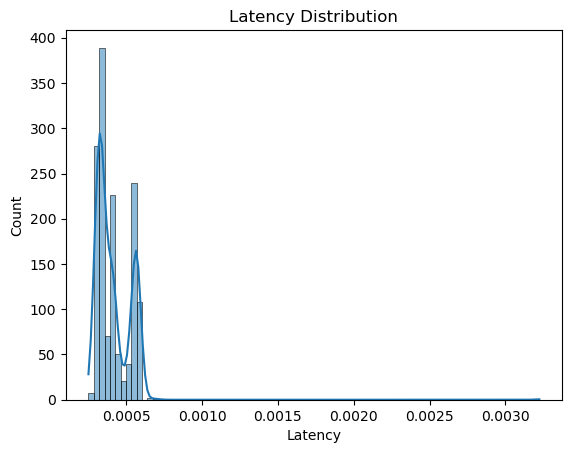

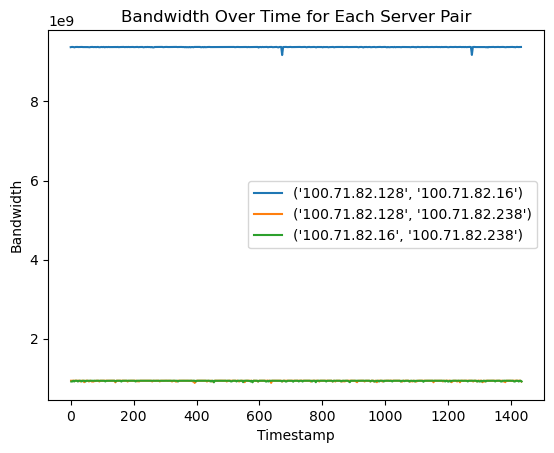

In [8]:
# Load the data
df = pd.read_csv('ping_results.csv')

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a new column for the hour of the day
df['hour'] = df['timestamp'].dt.hour

# Hourly averages
hourly_averages = df.groupby('hour').mean()
print(hourly_averages)

# Server pair analysis
server_pair_averages = df.groupby(['server1', 'server2']).mean()
print("Server pair with highest average latency: ", server_pair_averages['latency'].idxmax())
print("Server pair with highest average packet loss: ", server_pair_averages['packet_loss'].idxmax())
print("Server pair with lowest average bandwidth: ", server_pair_averages['bandwidth'].idxmin())

# Latency distribution
sns.histplot(df['latency'], kde=True)
plt.title('Latency Distribution')
plt.xlabel('Latency')
plt.show()

# Bandwidth over time for each server pair
server_pairs = df.groupby(['server1', 'server2'])

for name, group in server_pairs:
    group['bandwidth'].plot(label=str(name))
    
plt.title('Bandwidth Over Time for Each Server Pair')
plt.xlabel('Timestamp')
plt.ylabel('Bandwidth')
plt.legend()
plt.show()


Peak hours for network usage (in order of highest to lowest bandwidth): [21, 2, 3, 20, 23, 5, 7, 0, 1, 19, 6, 22, 4]


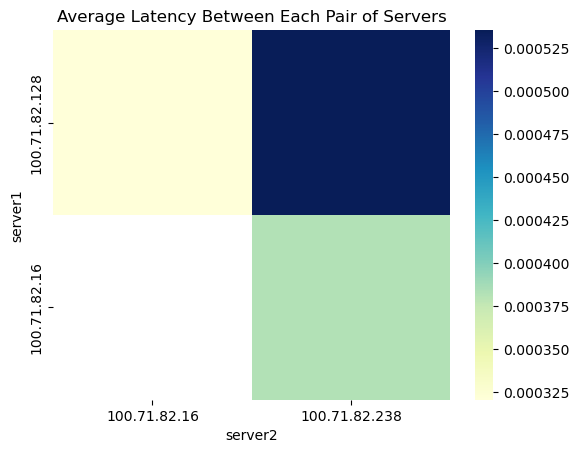

Server pair with most frequent non-zero packet loss: ('100.71.82.128', '100.71.82.16')
Bandwidth trend slope: -17253.882340683947
There's a decreasing trend in bandwidth over time.


In [9]:
from scipy import stats
# Load the data
df = pd.read_csv('ping_results.csv')

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a new column for the hour of the day
df['hour'] = df['timestamp'].dt.hour

# Peak hours analysis
peak_hours = df.groupby('hour')['bandwidth'].mean().sort_values(ascending=False)
print("Peak hours for network usage (in order of highest to lowest bandwidth):", peak_hours.index.tolist())

# Latency heatmap
pivot_table = df.pivot_table(values='latency', index='server1', columns='server2')
sns.heatmap(pivot_table, cmap="YlGnBu")
plt.title('Average Latency Between Each Pair of Servers')
plt.show()

# Packet loss analysis
df['packet_loss_indicator'] = df['packet_loss'].apply(lambda x: 1 if x > 0 else 0)
server_pair_packet_loss = df.groupby(['server1', 'server2'])['packet_loss_indicator'].sum().idxmax()
print("Server pair with most frequent non-zero packet loss:", server_pair_packet_loss)

# Bandwidth trend
slope, intercept, r_value, p_value, std_err = stats.linregress(df.index, df['bandwidth'])
print("Bandwidth trend slope:", slope)
if slope > 0:
    print("There's an increasing trend in bandwidth over time.")
elif slope < 0:
    print("There's a decreasing trend in bandwidth over time.")
else:
    print("There's no clear trend in bandwidth over time.")

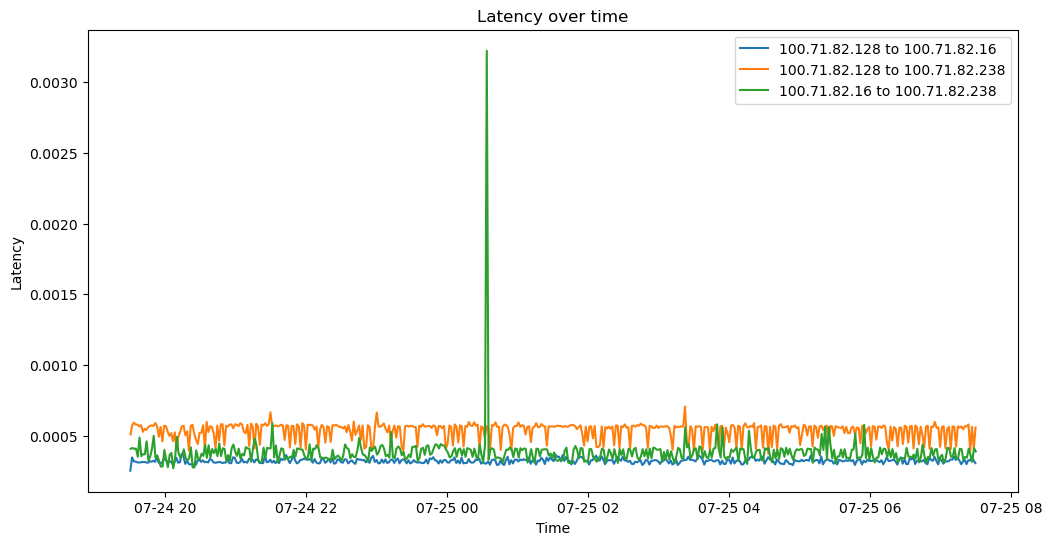

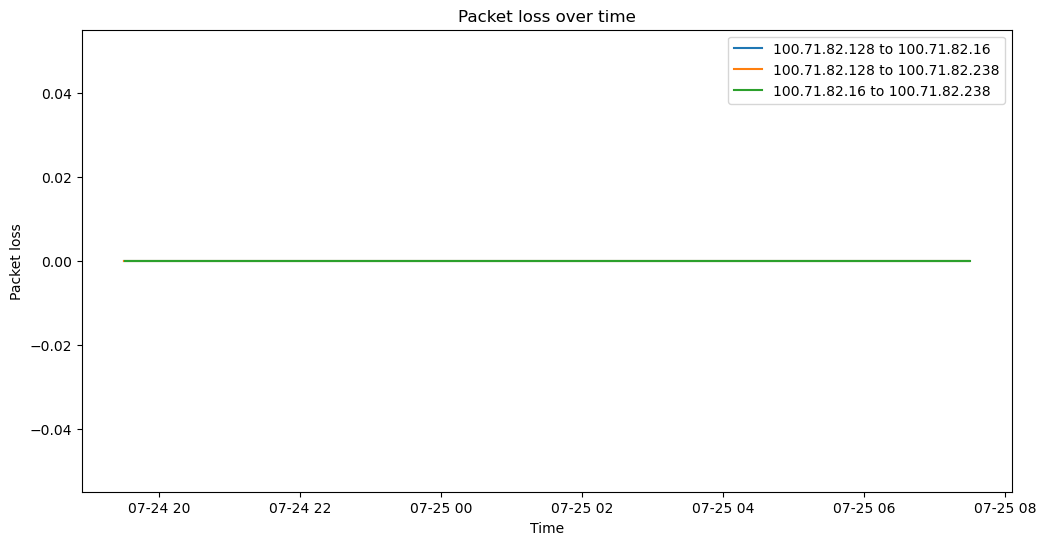

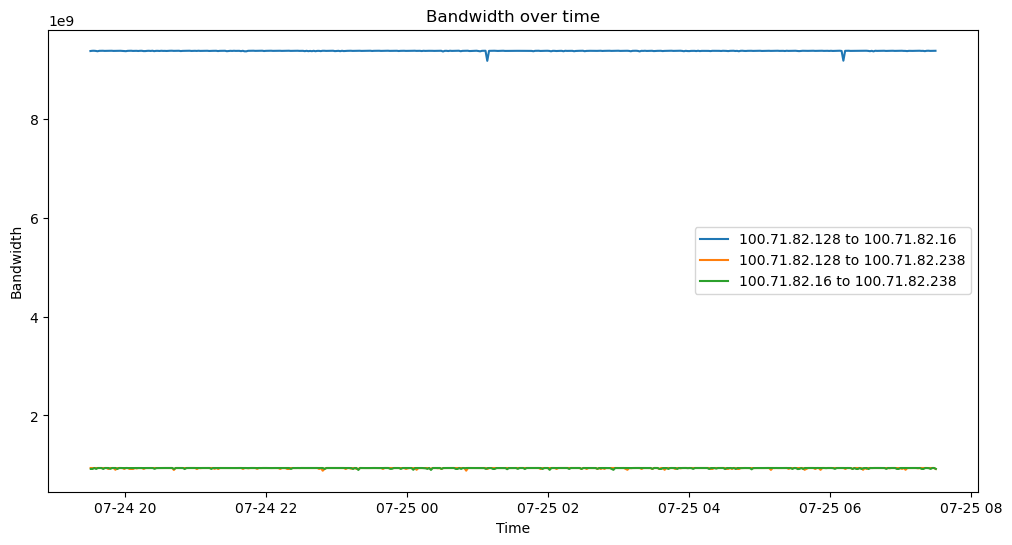

In [10]:
# Load the data
df = pd.read_csv('ping_results.csv')

# Convert the timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the timestamp as the index
df.set_index('timestamp', inplace=True)

# Plot latency over time
plt.figure(figsize=(12, 6))
for server_pair in df[['server1', 'server2']].drop_duplicates().values.tolist():
    mask = (df['server1'] == server_pair[0]) & (df['server2'] == server_pair[1])
    plt.plot(df.loc[mask, 'latency'], label=f'{server_pair[0]} to {server_pair[1]}')
plt.legend()
plt.title('Latency over time')
plt.xlabel('Time')
plt.ylabel('Latency')
plt.show()

# Plot packet loss over time
plt.figure(figsize=(12, 6))
for server_pair in df[['server1', 'server2']].drop_duplicates().values.tolist():
    mask = (df['server1'] == server_pair[0]) & (df['server2'] == server_pair[1])
    plt.plot(df.loc[mask, 'packet_loss'], label=f'{server_pair[0]} to {server_pair[1]}')
plt.legend()
plt.title('Packet loss over time')
plt.xlabel('Time')
plt.ylabel('Packet loss')
plt.show()

# Plot bandwidth over time
plt.figure(figsize=(12, 6))
for server_pair in df[['server1', 'server2']].drop_duplicates().values.tolist():
    mask = (df['server1'] == server_pair[0]) & (df['server2'] == server_pair[1])
    plt.plot(df.loc[mask, 'bandwidth'], label=f'{server_pair[0]} to {server_pair[1]}')
plt.legend()
plt.title('Bandwidth over time')
plt.xlabel('Time')
plt.ylabel('Bandwidth')
plt.show()
